# Data Analysis on Titanic Dataset 

## Importing the modules needed

In [1]:
#data Processing
import pandas as pd
#linear algebra
import numpy as np
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#analysis 
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score,plot_confusion_matrix,confusion_matrix
#dealing with warnings 
import warnings

### Ignore the warnings

In [2]:
warnings.filterwarnings('ignore')

## Getting the data

In [3]:
df = pd.read_csv(r'C:\Users\123\datasets_11657_16098_train.csv')

# Data Exploration/Visual Analysis 

## Analysis of the code by displaying top 10 records

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#The observations above lead to a conclusion :
#Target Column -> Survived
#Features -> We need to observe the rest and check for the appropriate ones
df.count()
#count of the various entries in the data columns

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
"""
PassengerId   : Unique ID of a Passenger
Survived      : Survival
Pclass        : Passenger Class
Name          : Name of the Passenger
Sex           : Gender of the Passenger
Age           : Age of the Passenger
SibSp         : Number of siblings/spouse of Passenger Aboard
Parch         : Number of parent/children of Passenger Aboard
Ticket        : Ticket Number
Fare          : Passenger's Fare
Cabin         : Cabin Number
Embarked      : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
"""

"\nPassengerId   : Unique ID of a Passenger\nSurvived      : Survival\nPclass        : Ticket Class\nName          : Name of the Passenger\nSex           : Sex of the Passenger\nAge           : Age of the Passenger\nSibSp         : Number of siblings/spouse of Passenger Aboard\nParch         : Number of parent/children of Passenger Aboard\nTicket        : Ticket Number\nFare          : Passenger's Fare\nCabin         : Cabin Number\nEmbarked      : Port of Embarkation\n"

In [7]:
#The training-set has 891 examples and 11 features + the target variable (survived). 
#2 of the features are floats, 5 are integers and 5 are objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking the data

In [8]:
df.describe()
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Above we can see that 38% out of the training-set survived the Titanic. 
#We can also see that the passenger ages range from 0.4 to 80.
#On top of that we can already detect some features, that contain missing values, like the ‘Age’,'Cabin' and 'Embarked' feature.

In [10]:
#Check for the target columns count separately
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Check for the relation between various features and our target column

In [11]:
df.Sex.value_counts()
#total number of respective sex

male      577
female    314
Name: Sex, dtype: int64

In [12]:
df[df.Sex=='male'].Survived.value_counts()
#Check for the number of Males Survived and not Survived

0    468
1    109
Name: Survived, dtype: int64

In [13]:
df[df.Sex=='female'].Survived.value_counts()
#Check for the number of Females Survived and not Survived

1    233
0     81
Name: Survived, dtype: int64

In [14]:
df[['Sex','Survived']].groupby('Sex',as_index=False).mean()
#Percentage of the survival of the different sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


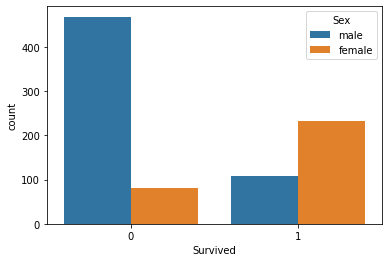

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)
#Sex survival analysis

In [16]:
df.SibSp.value_counts()
#count of the number of the relatives along dependent persons

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()
#Percentage of the survival dependent on the number of sibling ,spouse along

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


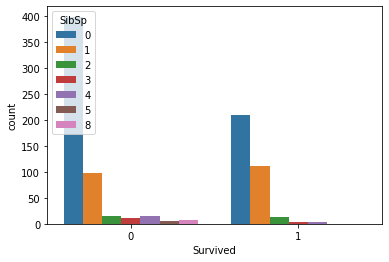

In [18]:
sns.countplot(x='Survived', hue='SibSp', data=df)
#SibSp survival analysis

In [19]:
df.Pclass.value_counts()
#Pclass count 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()
#Percentage%100 of the survival of the persons belonging to different Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


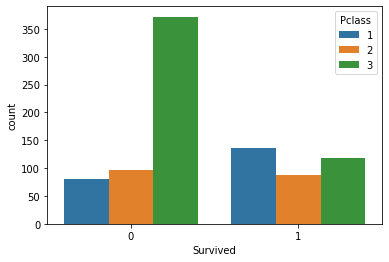

In [21]:
sns.countplot(x='Survived', hue='Pclass', data=df)
#Pclass survival analysis
#Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

In [22]:
df.Parch.value_counts()
#Parch counts

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
df[['Parch','Survived']].groupby('Parch',as_index=False).mean()
#Percentage%100 of the survival of the persons having respective number of parents and children

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


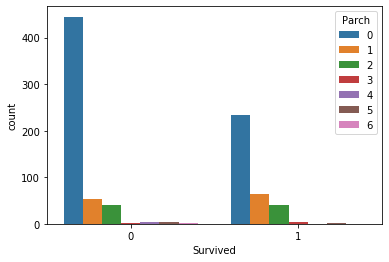

In [24]:
sns.countplot(x='Survived', hue='Parch', data=df)
#Parch survival analysis

In [25]:
df.Embarked.value_counts()
#Embarked count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
#Percentage%100 of the survival of the persons belonging to different Embarked point

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


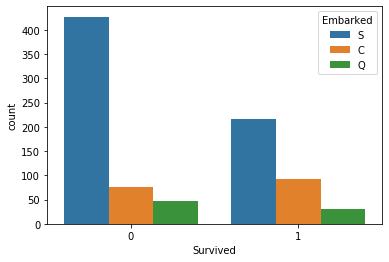

In [27]:
sns.countplot(x='Survived', hue='Embarked', data=df)
#Embarked survival analysis

In [28]:
df[df.Fare==0.0].Survived.value_counts()
#count of persons survived or not having fare value=0

0    14
1     1
Name: Survived, dtype: int64

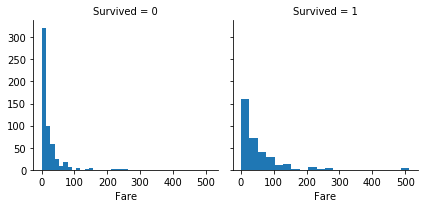

In [29]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
#Survival dependent on Fare

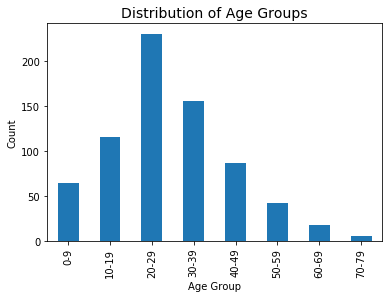

In [30]:

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), labels=age_labels)
df.groupby(['age_group']).size().plot(kind='bar')
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
#count of how many persons of particular age were there 

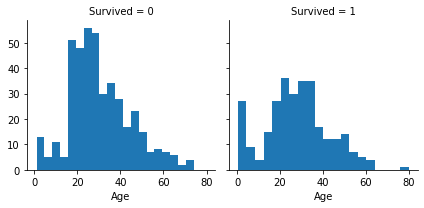

In [31]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
#Comparison of Age dependent survival
#Infants (Age <=4) had high survival rate. 
#Oldest passengers (Age = 80) survived. 
#Large number of 15-25 year olds did not survive.
#Most passengers are in 15-35 age range.

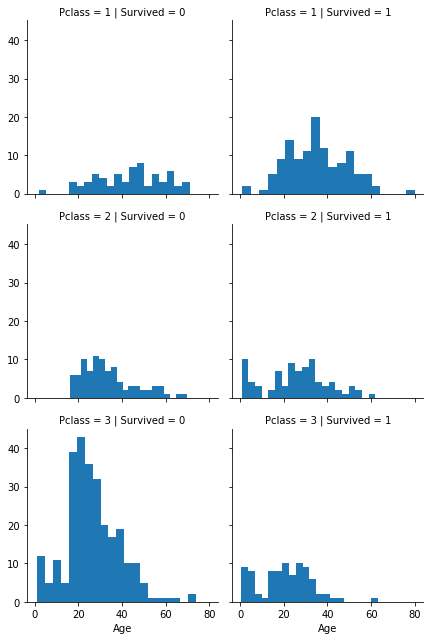

In [32]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age',bins=20)
grid.add_legend();
#different Pclass and respective classes survival analysis
#The plot confirms our assumption about pclass 1,
#but we can also spot a high probability that a person in pclass 3 will not survive.

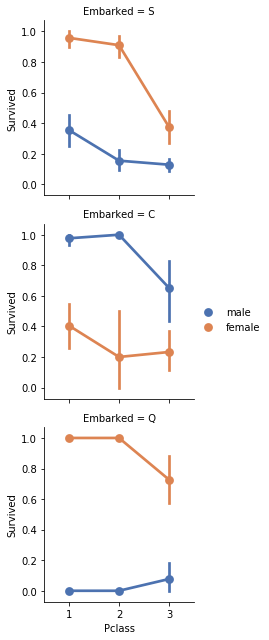

In [33]:
grid = sns.FacetGrid(df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette="deep")
grid.add_legend()
#Combination of Pclass,Embarked and Sex as feature for analysis
#Embarked seems to be correlated with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
#Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

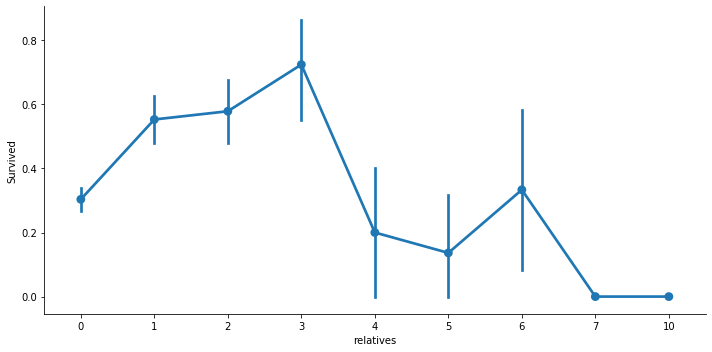

In [34]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=df,aspect=2 )
#checking for the possibility of if the survival is dependent on the number of relatives along
#Here we can see that you had a high probability of survival with 1 to 3 realtives,
#but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives)

In [35]:
df1 = df[['Pclass','Sex','Age','Fare','Embarked']]
df1.head()
#taking the possible features to further find and fill the Nan values in them
#we are not taking PassengerId,Name and Ticket number into consideration for features of our data
#we are excluding Cabin column because we are having insufficient data of it for analysis i.e,23% and rest are Nan values

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [36]:
df1.isnull().sum()
#checking the Nan values

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [37]:
df.Age.agg(['max','min','mean','median'])
#aggregate of age just to check for what fits well in the Nan values (either Mean or Median are approximately close ?)

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [38]:
df1.Embarked.value_counts()
#total count of respective embarked values to know about from where max number of passengers boarded to put it in Nan places

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
#filling the Nan value in Age column by mean of the column and
#the Embarked column having 2 Nan values is replaced with most frequent value i.e->S
df1.fillna({'Age':df1.Age.mean(),
           'Embarked':'S'},inplace=True)
df1.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [40]:
### One hot encoding for the non numerical values to make it comparable 
df2 = pd.get_dummies(df1[['Sex','Embarked']])
df2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [41]:
# taking the numerical valued columns from considered columns excluding the ones with object datatype
df3 = df1.select_dtypes(exclude=['object'])    #
df3.head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [42]:
#concatinating the one hot encoded valued dataframe with the filtered dataframe
final_data = pd.concat((df2,df3),axis=1)
Y=df.Survived.values
# axis=1: for concatenating 2 or more dataframe as a column wise
final_data.head()
#to have a look at our final data 

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,Fare
0,0,1,0,0,1,3,22.0,7.2500
1,1,0,1,0,0,1,38.0,71.2833
2,1,0,0,0,1,3,26.0,7.9250
3,1,0,0,0,1,1,35.0,53.1000
4,0,1,0,0,1,3,35.0,8.0500


In [43]:
final_data.isnull().sum()
#check for the null value in the final modified data

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass        0
Age           0
Fare          0
dtype: int64

In [44]:
X=final_data

## Visual Analysis of Our Final data features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A939CAFC8>,
      dtype=object)

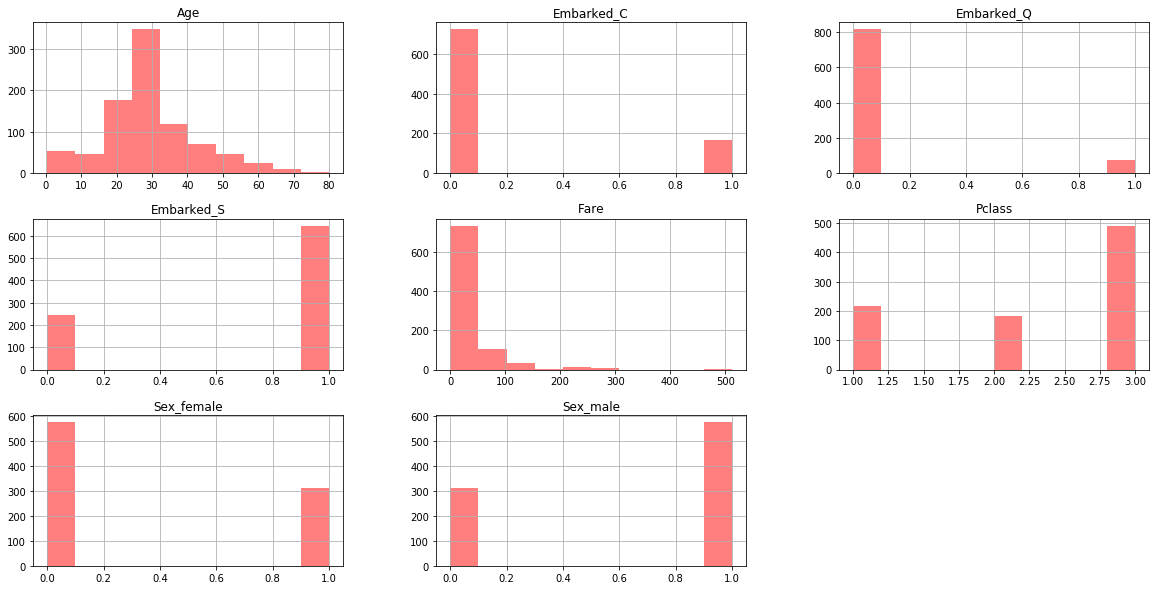

In [45]:
X.hist(color='r',alpha=0.5,figsize=(20,10))
#analysis of each column and its corresponding values

## Building Models for prediction

In [46]:
#training and testing data split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


73.74


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


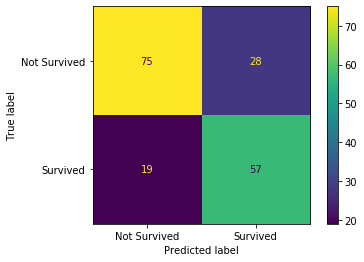

In [47]:
#LOGISTIC REGRESSION
log = LogisticRegression(C=1.5,class_weight='balanced',verbose=1,random_state=12)
#C :Inverse of regularization strength; must be a positive float. 
#class_weight: Weights associated with classes,The “balanced” mode uses the values of y 
                                #to automatically adjust weights inversely proportional to class frequencies in the input data 
#verbose:For the liblinear and lbfgs solvers,set verbose to any positive number for verbosity.
#random_state: Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. 
log.fit(X_train,Y_train)
#fitting training data into Logistic Regression
Y_pred=log.predict(X_test)
#predicting values of testing dataset
acc_log=round(accuracy_score(Y_pred,Y_test)*100,2)
#checking for accuracy in predicted value with respect to real values 
print(acc_log)
#print(confusion_matrix(Y_test,Y_pred))
plot_confusion_matrix(log,X_test,Y_test,display_labels=["Not Survived","Survived"])

82.68156424581005
Important features
____________________________________________________________


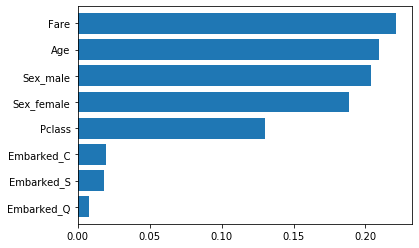

In [48]:
#RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier( n_estimators=700,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
#n_estimators: The number of trees in the forest.
#min_samples split: The minimum number of samples required to split an internal node
#min_sample_leaf: The minimum number of samples required to be at a leaf node.
#max_features: The number of features to consider when looking for the best split
#oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy
#random_state: Controls both the randomness of the bootstrapping of the samples used when building trees
#n_jobs: The number of jobs to run in parallel.-1 means using all processors.
rf.fit(X_train,Y_train)
#fitting Random Forest to training dataset 
Y_predi=rf.predict(X_test)
#predicting values on X_test set
acc_rf=accuracy_score(Y_predi,Y_test)*100
#predicting accuracy score of prediction
print(acc_rf)
print("Important features")
#extracting important features with respect to Random Forest
pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)

78.2122905027933


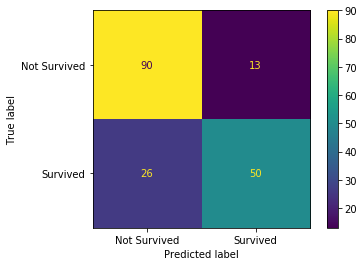

In [49]:
#DECISION TREE
DTclassifier=DecisionTreeClassifier(criterion="entropy",splitter="random",random_state=40,class_weight="balanced")
#criterion: The function to measure the quality of a split.
#splitter: The strategy used to choose the split at each node.
#random_state: Controls the randomness of the estimator.
#class_weight: Weights associated with classes
DTclassifier.fit(X_train,Y_train)
#fitting training data to Decision tree classifier
Y_pred_dtc=DTclassifier.predict(X_test)
#prediction on test dataset
acc_DT=accuracy_score(Y_pred_dtc,Y_test)*100
#Getting accuracy of prediction 
plot_confusion_matrix(DTclassifier,X_test,Y_test,display_labels=["Not Survived","Survived"])
print(acc_DT)
#print(confusion_matrix(Y_test, Y_pred_dtc))

In [50]:
#SUPPORT VECTOR MACHINE
classifier = SVC(kernel='rbf',probability=True)
#kernel: Specifies the kernel type to be used in the algorithm.
#probability: Whether to enable probability estimates
classifier.fit(X_train,Y_train)
#fitting training data to SVC
Y_pred_svm = classifier.predict(X_test)
#prediction of Y on test values
cm = confusion_matrix(Y_test,Y_pred_svm)
#checking of how many values match efficiently with prediction
print(cm)
#plot_confusion_matrix(classifier,X_test,Y_test,display_labels=["Not Survived","Survived"])
acc_svc = accuracy_score(Y_pred_svm,Y_test)*100
#prediction accuracy check
print(acc_svc)

[[93 10]
 [47 29]]
68.15642458100558


68.15642458100558


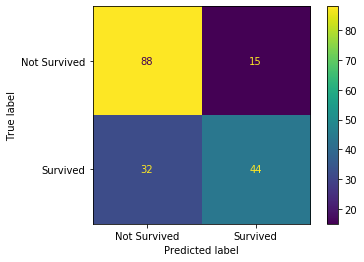

In [51]:
#K-NEAREST NEIGHBORS
KNclassifier=KNeighborsClassifier(n_neighbors=3)
#n_neighbors: Number of neighbors to use 
KNclassifier.fit(X_train,Y_train)
#fitting data using KNN 
Y_predk=classifier.predict(X_test)
#predicting y values on testing values
acck=accuracy_score(Y_predk,Y_test)*100
#check for accuracy of prediction
#cmk=confusion_matrix(Y_predk,Y_test)
print(acck)
#print(cmk)
plot_confusion_matrix(KNclassifier,X_test,Y_test,display_labels=["Not Survived","Survived"])

In [52]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acck, acc_log, acc_rf,acc_DT]})
#building a dataframe with corresponding scores of the models 
result_df = results.sort_values(by='Score', ascending=False)
#arranging the data in descending form
result_df = result_df.set_index('Score')
#setting score as index of the dataframe
result_df

,Model
Score,
82.681564,Random Forest
78.212291,Decision Tree
73.740000,Logistic Regression
68.156425,Support Vector Machines
68.156425,KNN
